# Методы на основе деревьев


## ЦЕЛЬ: Создать модель предсказания того, уйдёт ли абонент в отток (churn).

----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('2 DATA Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Часть 1: Общие характеристики данных

**Проверим типы колонок, а также узнаем, есть ли отсутствующие данные.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Часть 2:  Исследование данных (Exploratory Data Analysis)

## Исследование признаков


In [6]:
df.isnull().sum()
# Кол-во Null для каждого признака

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Проверка сбалансированности значений колонки с классами (Churn).**

<AxesSubplot:xlabel='Churn', ylabel='count'>

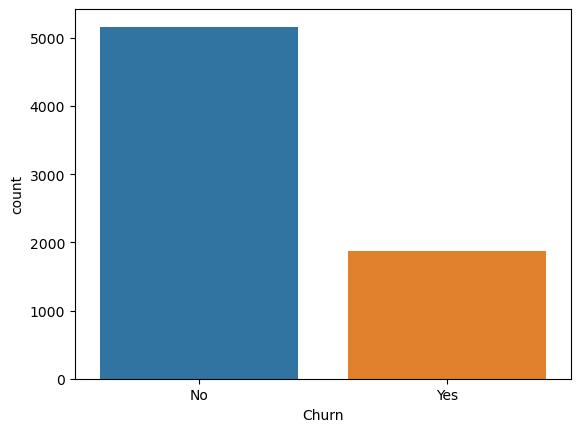

In [7]:
sns.countplot(data=df, x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

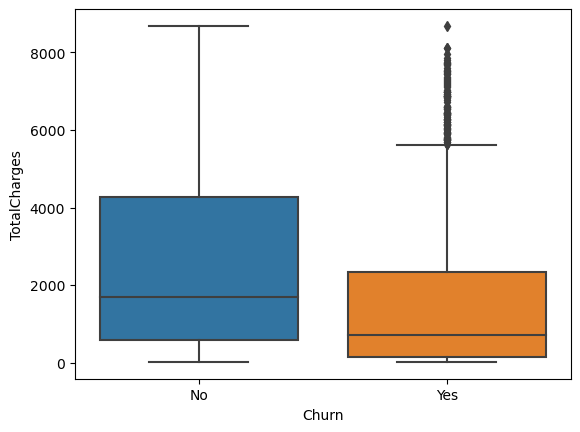

In [8]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

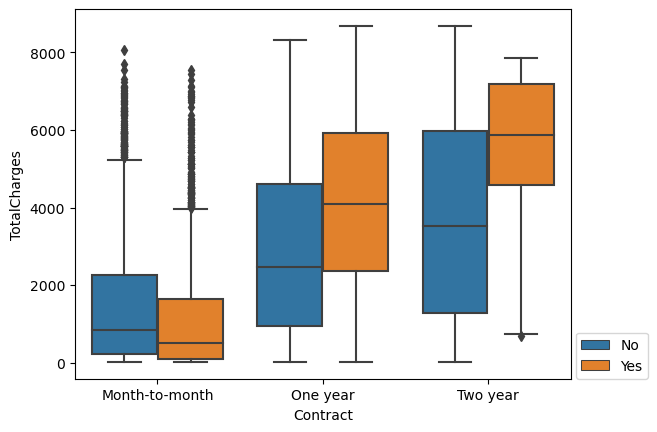

In [17]:
sns.boxplot(data=df, y='TotalCharges', x='Contract', hue='Churn')
plt.legend(loc=(1.01,0))

**Сконвертируем категориальные признаки в дамми-переменные для следующих колонок, потому что корреляция вычисляется только для числовых колонок.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
       
**Параметр drop-first можно не указывать, так как мы будем использовать методы на основе деревьев.**

In [19]:
df_1 = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']])
df_1

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,1,0
7028,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7029,0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7030,1,0,1,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [25]:
df_2 = df_1.corr()['Churn_Yes'].sort_values().iloc[1:-1] 

Text(0.5, 1.0, 'Корреляция признаков')

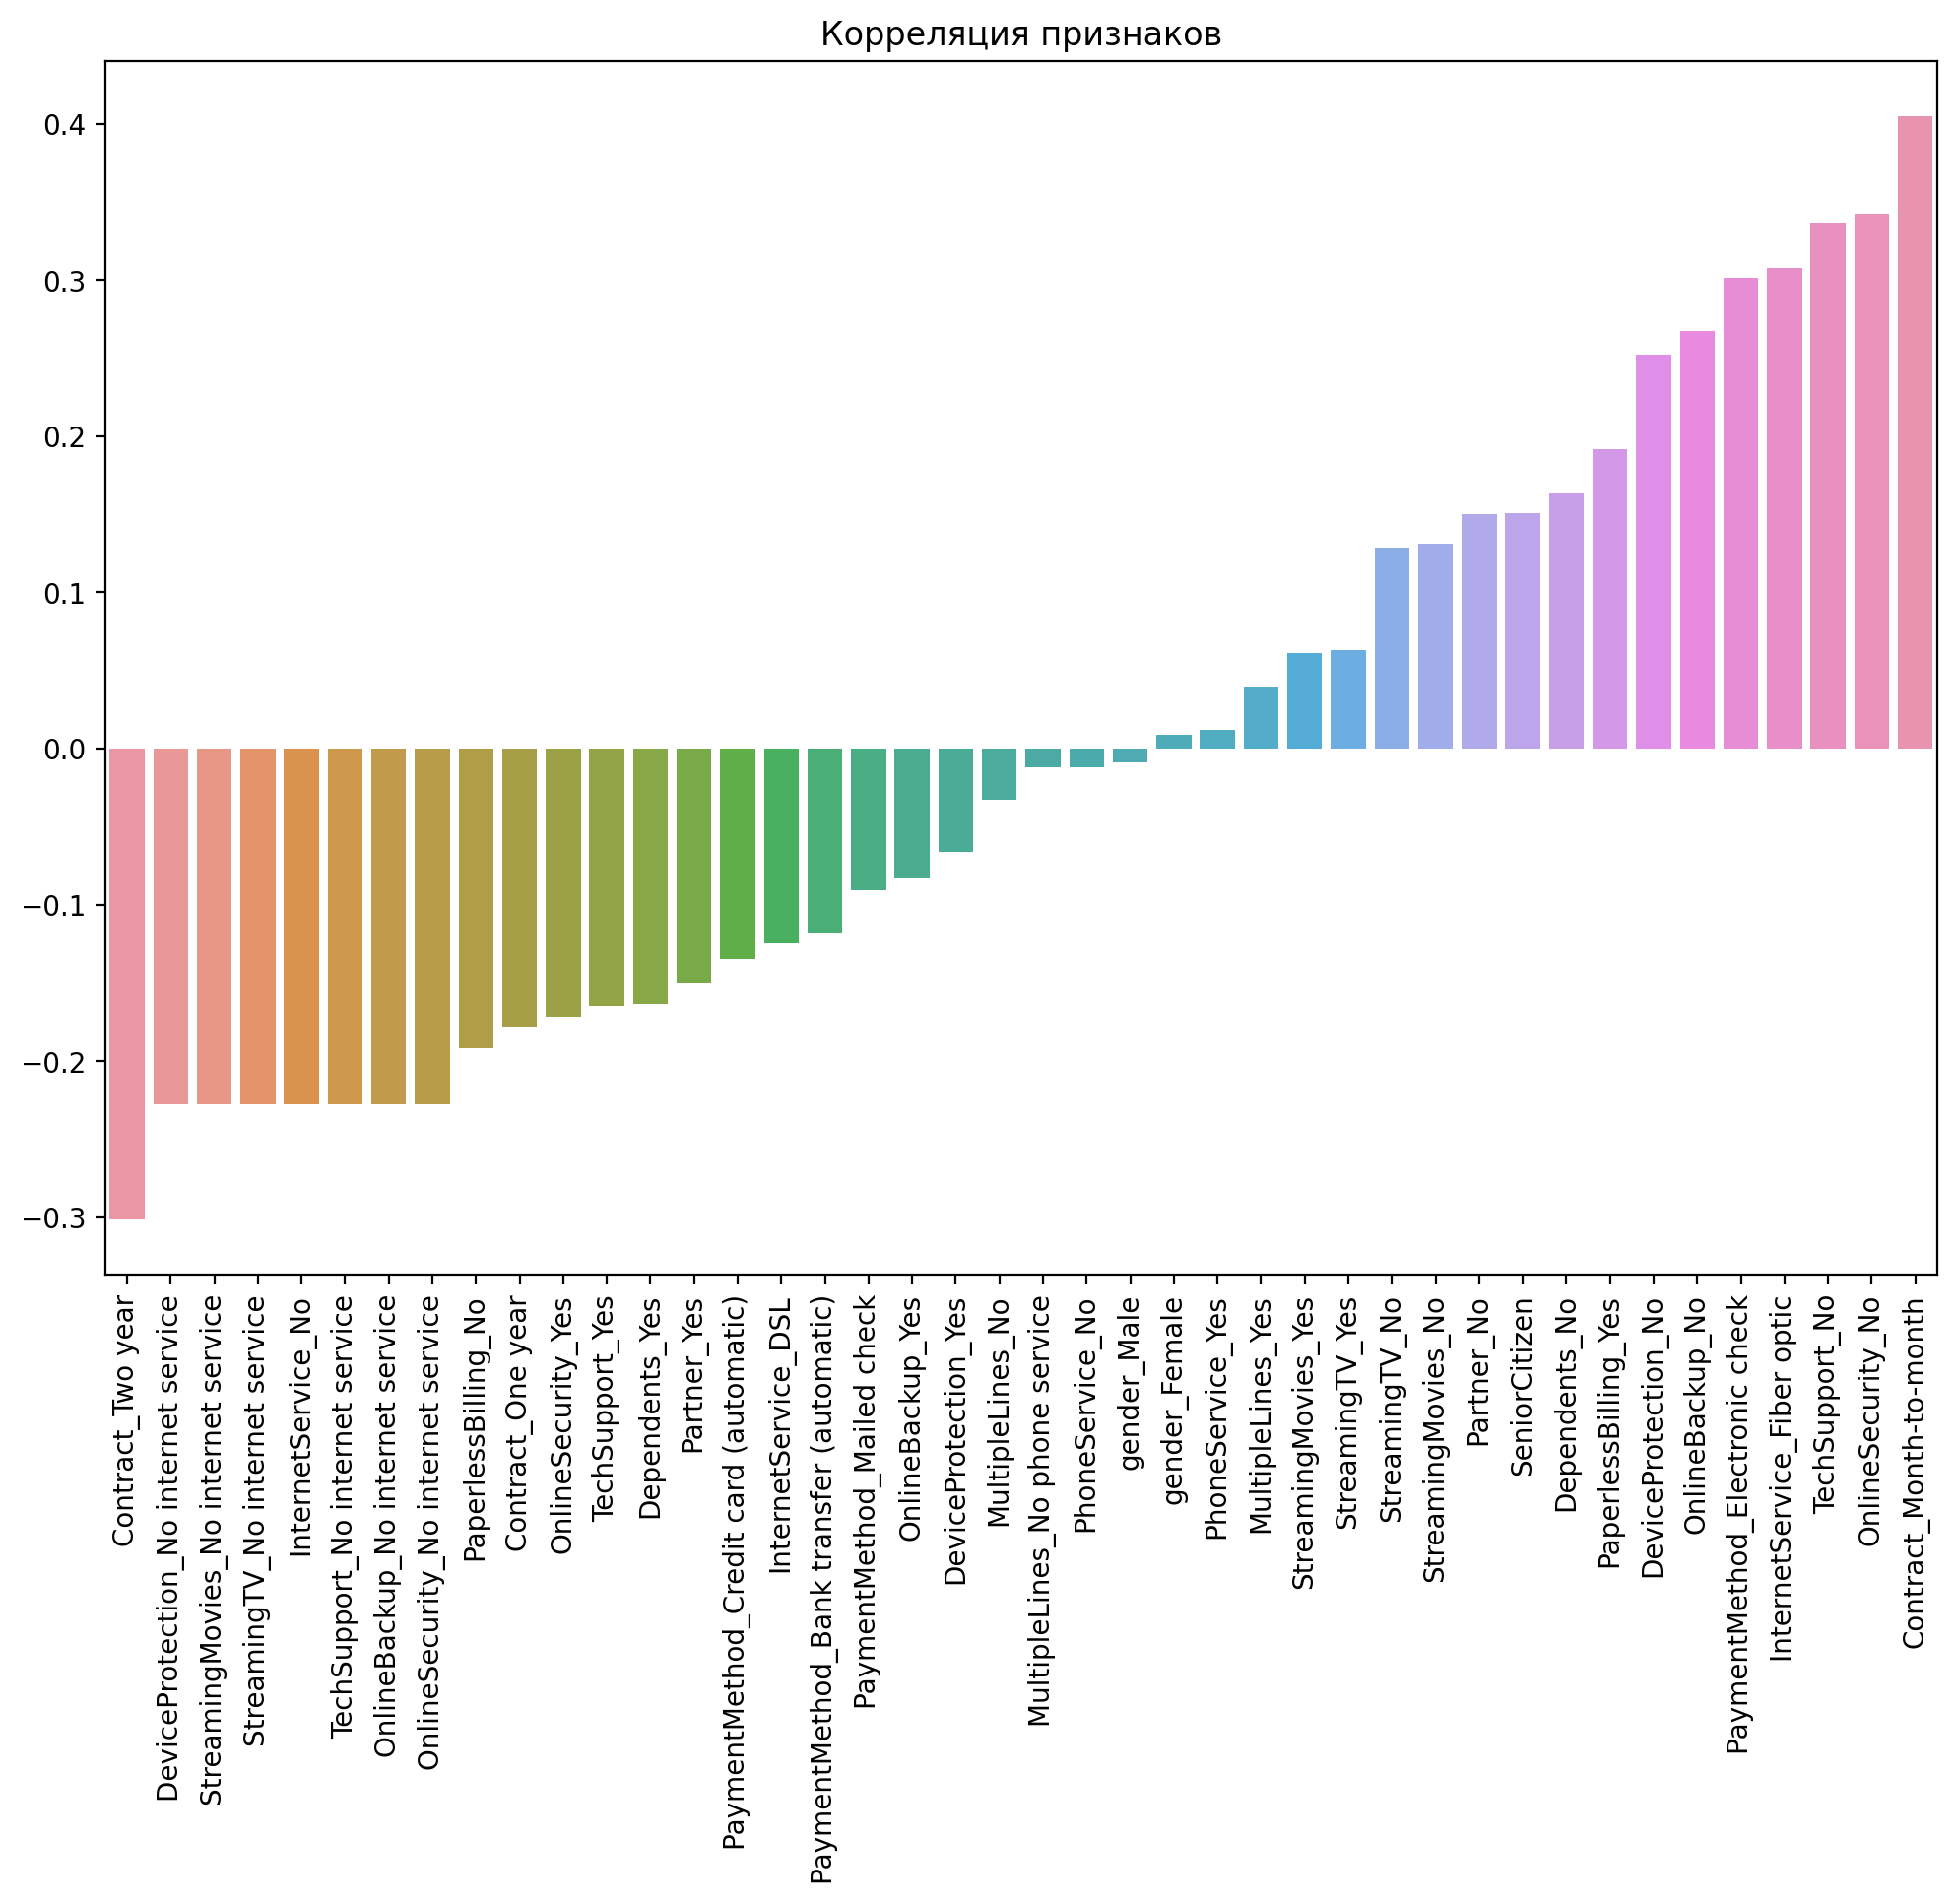

In [26]:
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(x=df_2.index, y=df_2.values)
plt.xticks(rotation=90)
plt.title('Корреляция признаков')

In [27]:
 df_1.corr()['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

---
---

# Часть 3: Анализ оттока

**Создавая "когорты" и выполняя сравнение данных между различными когортами, выполним сегментацию абонентов на основе колонки tenure**

**3 типа контракта (колонка Contract).**

In [69]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Гистограмма с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

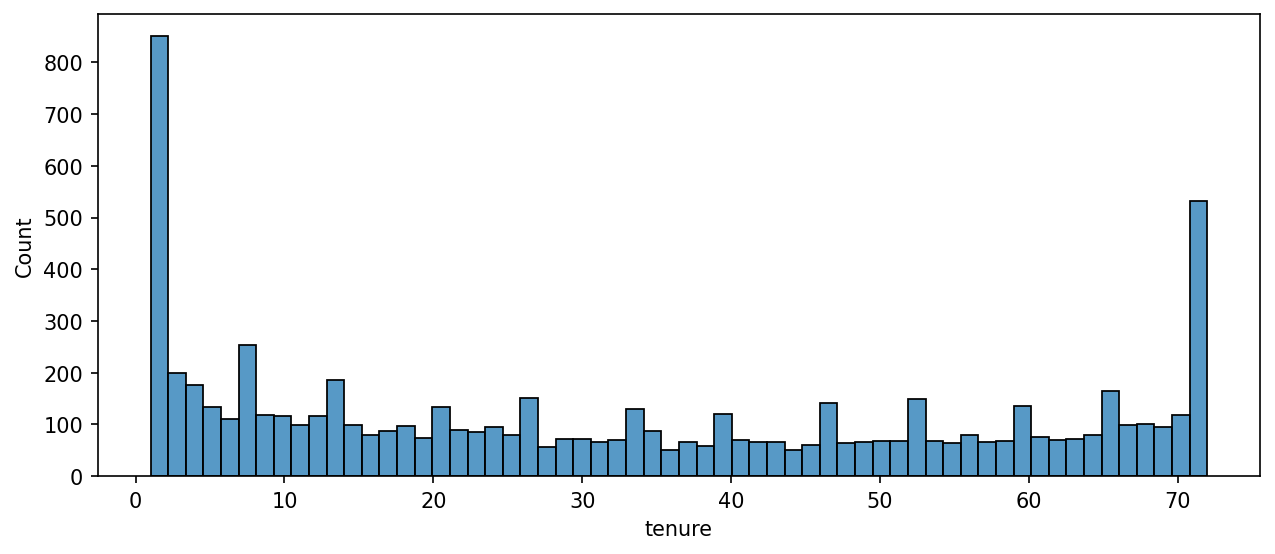

In [75]:
plt.figure(figsize=(10,4), dpi=150)
sns.histplot(data=df, x='tenure', bins=60)


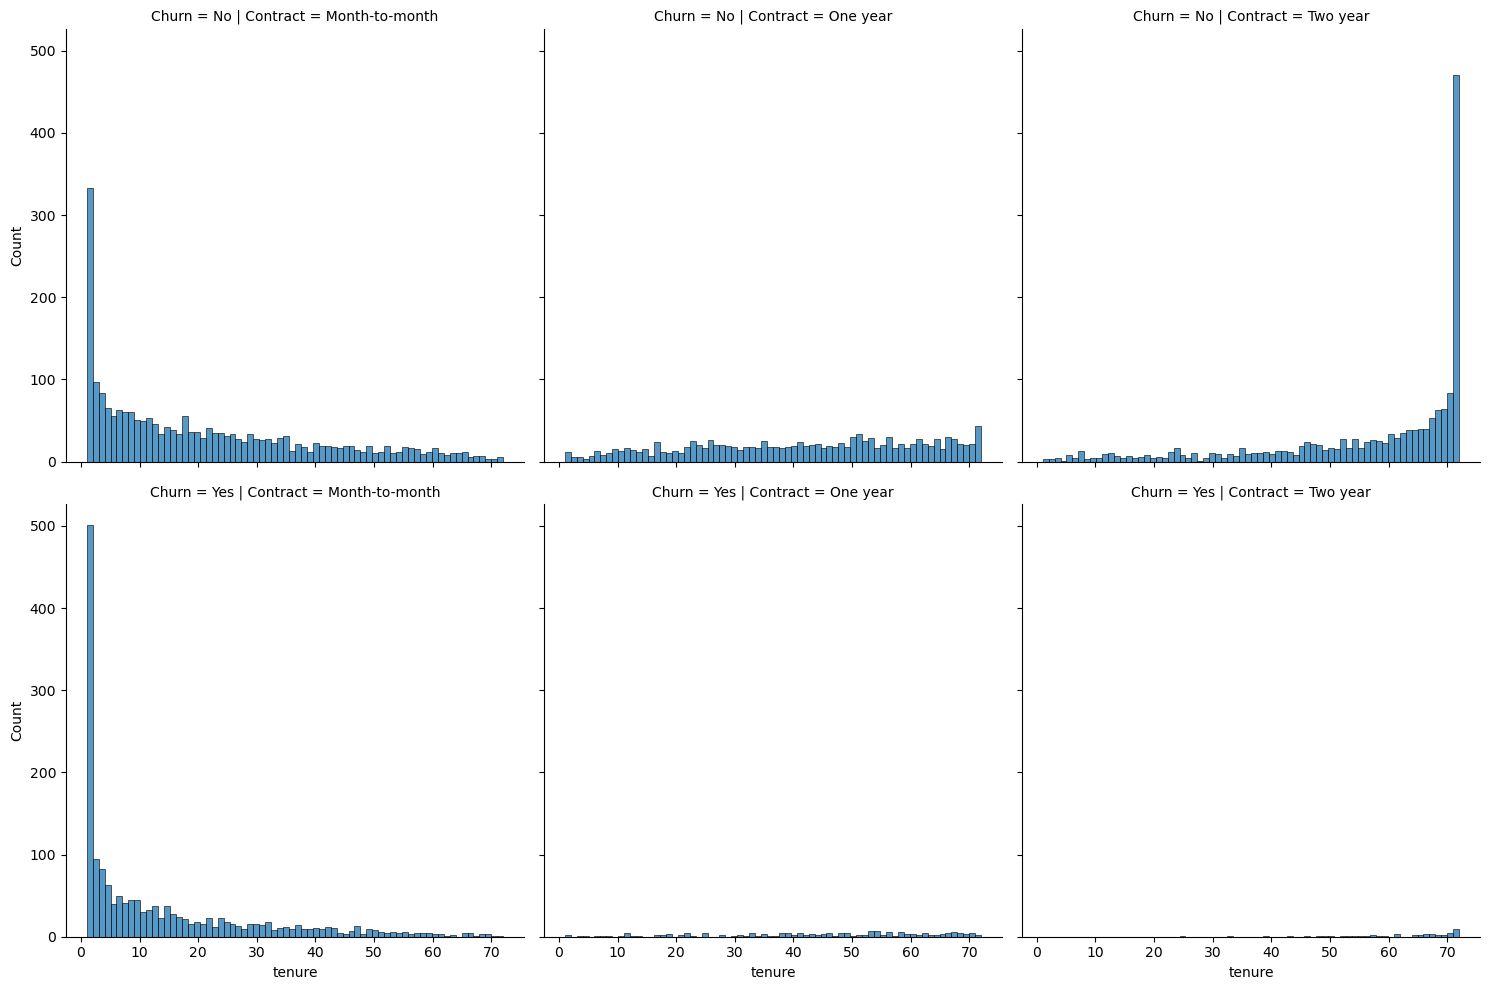

In [78]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

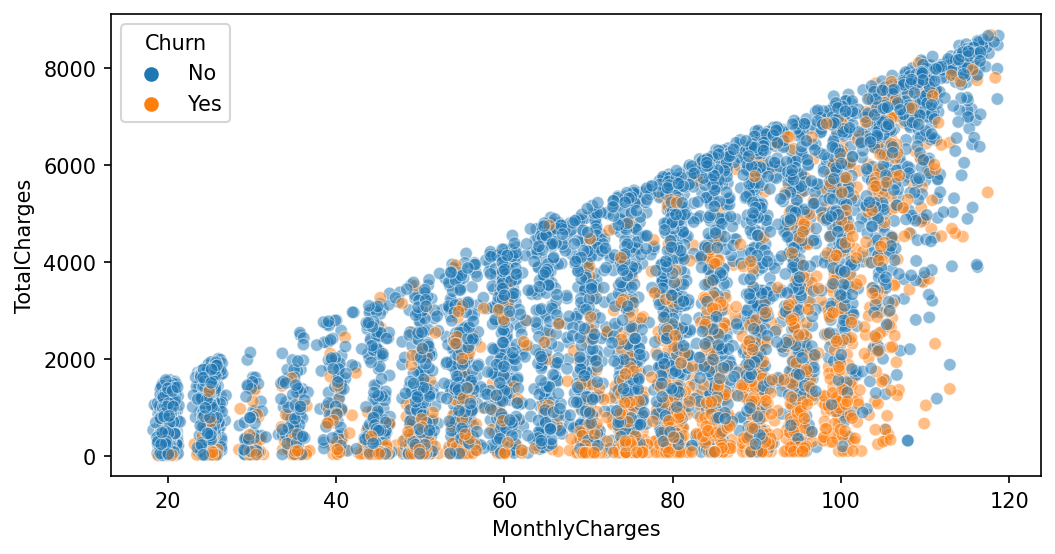

In [83]:
plt.figure(figsize=(8,4), dpi=150)
sns.scatterplot(data=df, y='TotalCharges', x='MonthlyCharges', hue='Churn', alpha=0.5)

### Создание когорт (сегментов) по колонке Tenure

**Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).**

**Для каждого уникального значения колонки tenure в качестве когорты, вычислим процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислим такой процент отдельно для каждой когорты. В итоге у Вас должны получиться когорты от 1 до 72 месяцев, и с увеличением количества месяцев уровень оттока должен снижаться. Это разумно, потому что чем дольше человек пользуется услугами компании, тем вероятнее то, что его/её всё устраивает, и он/она продолжит пользоваться этими услугами.**

In [28]:
Yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']
No_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [29]:
churn_rate = Yes_churn * 100 / (Yes_churn + No_churn)

In [30]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure'>

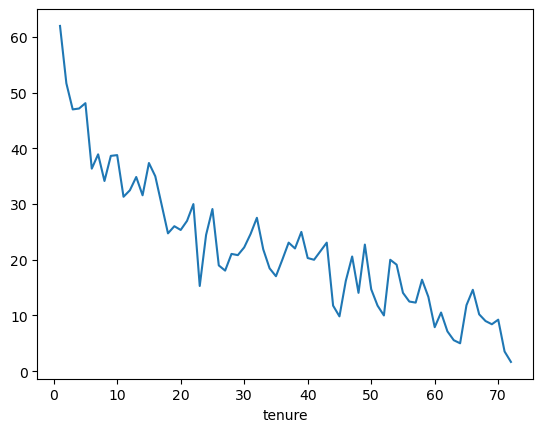

In [121]:
churn_rate.transpose()['customerID'].plot()

### Более крупные когорты (сегменты)
**На основе колонки tenure создадим новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'    

In [31]:
def func(x):
    if 0 <= x <= 12:
        return('0-12 Months')
    elif 13 <= x <= 24:
        return('12-24 Months')
    elif 25 <= x <= 48:
        return('24-48 Months')
    elif x > 48:
        return('Over 48 Months')

df['Tenure Cohort'] = df['tenure'].apply(func)

In [32]:
df['Tenure Cohort'][:9]

0     0-12 Months
1    24-48 Months
2     0-12 Months
3    24-48 Months
4     0-12 Months
5     0-12 Months
6    12-24 Months
7     0-12 Months
8    24-48 Months
Name: Tenure Cohort, dtype: object

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

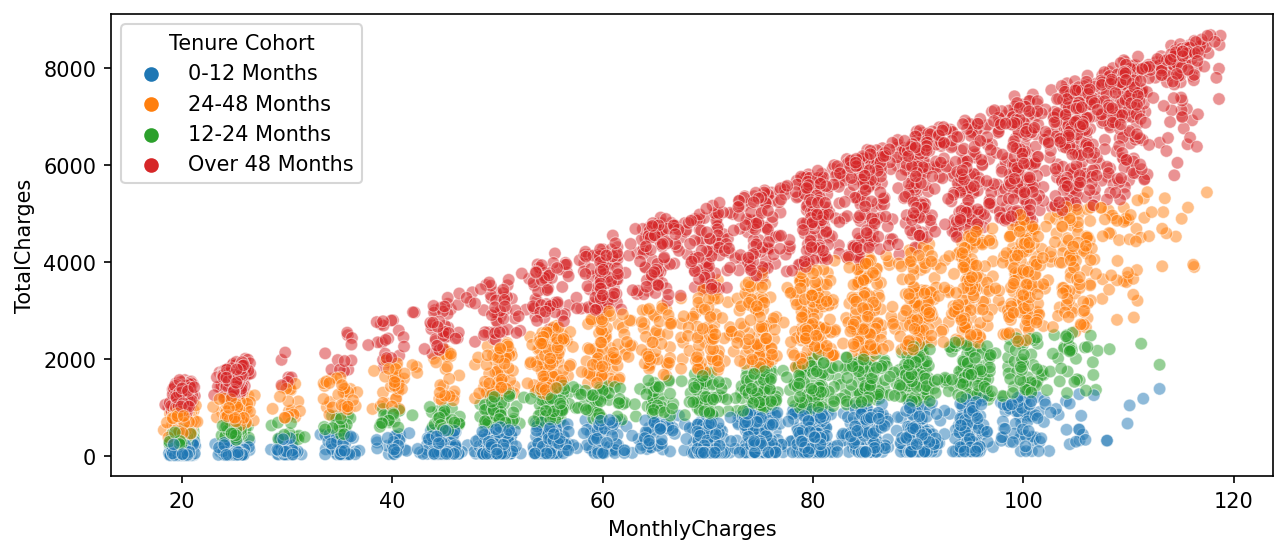

In [18]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.5)

**График countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

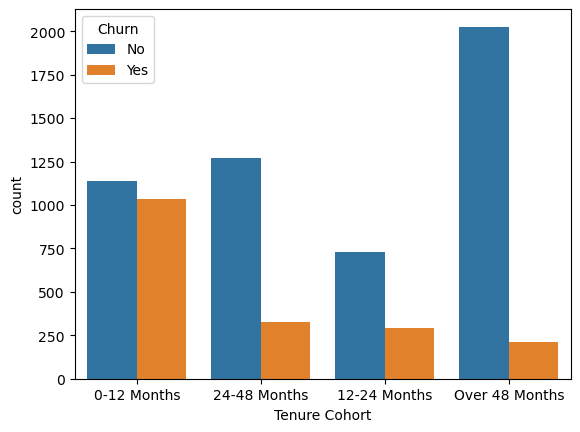

In [21]:
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')


-----

# Часть 4: Предиктивная модель

**Давайте исследуем 3 модели на основе деревьев: одно дерево решений, случайный лес и адаптивный бустинг.**


## Одно дерево решений (Decision Tree)

In [35]:
df = df.drop('customerID', axis=1)

KeyError: "['customerID'] not found in axis"

In [36]:
df = pd.get_dummies(data=df, drop_first=True)

In [37]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
dtree = DecisionTreeClassifier(max_depth=6)

In [41]:
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       557
           1       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



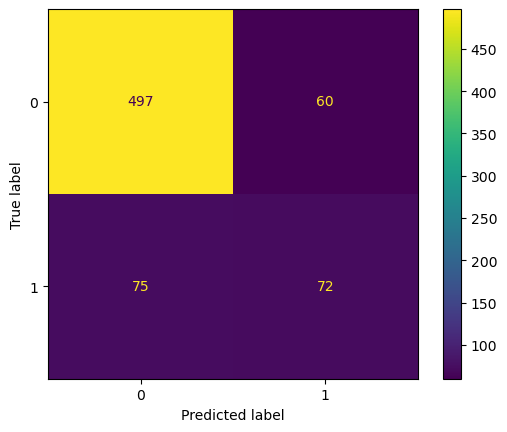

In [44]:
plot_confusion_matrix(dtree, X_test, y_test)

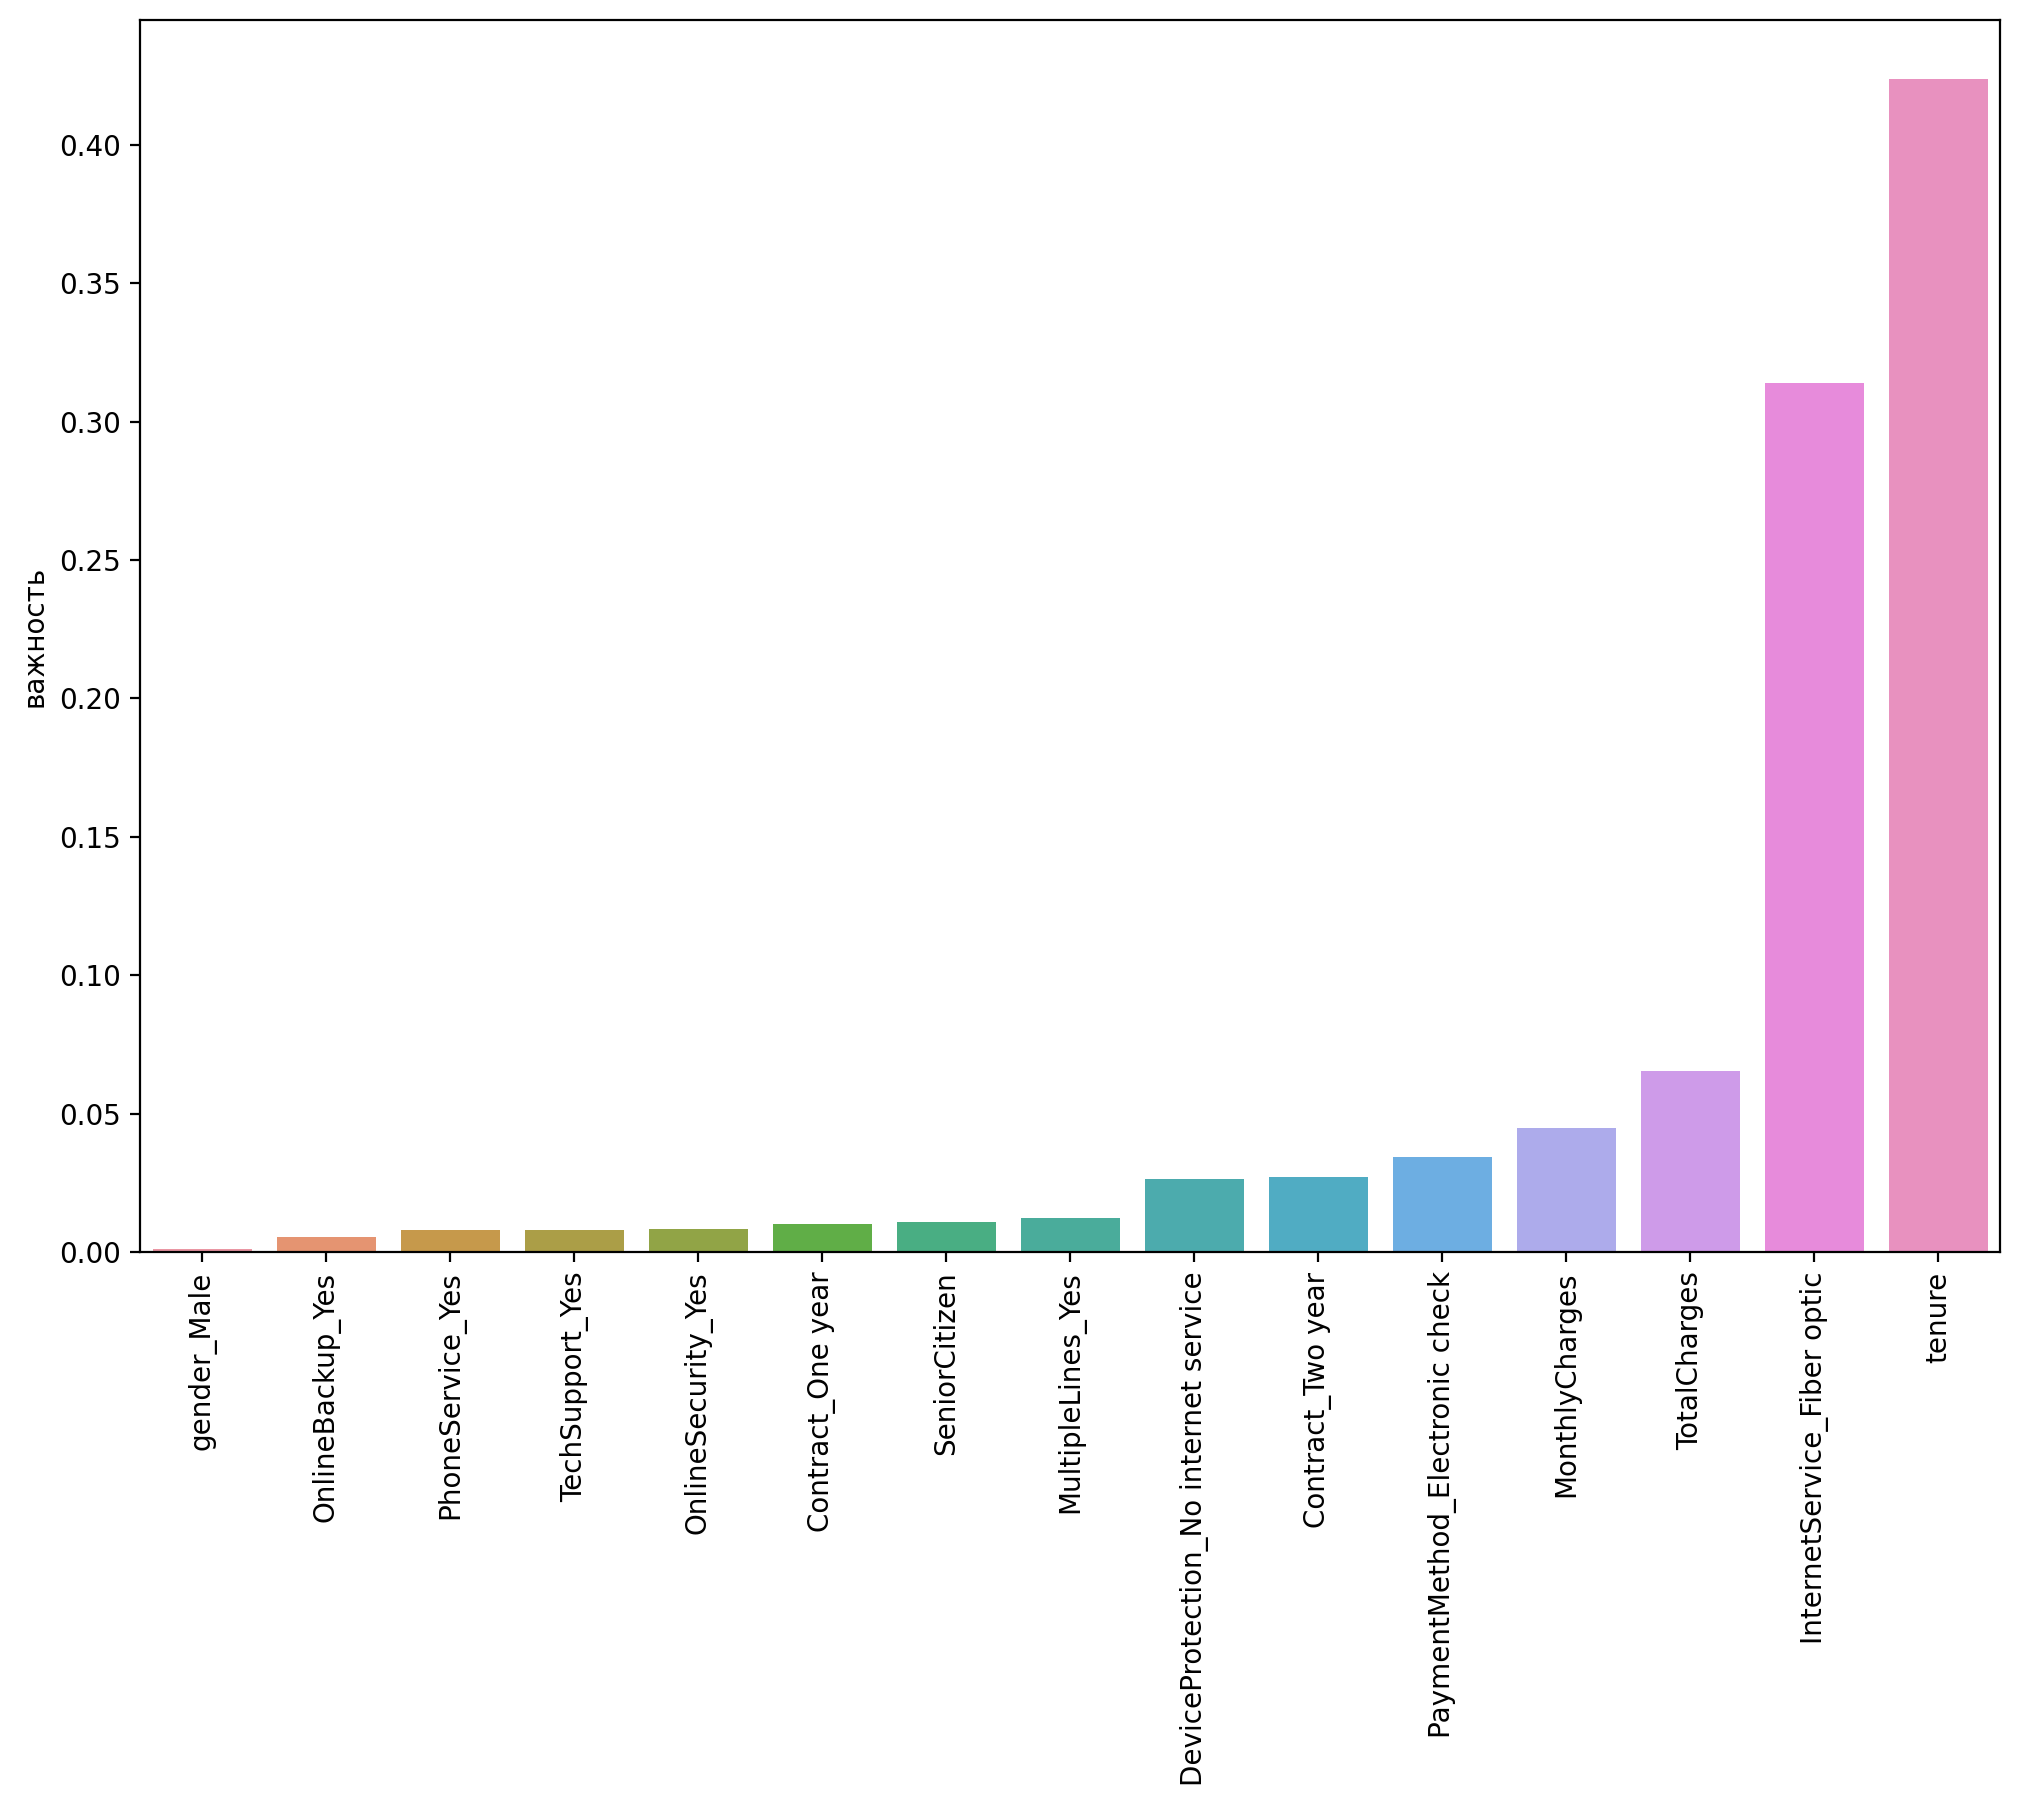

In [45]:
feats = pd.DataFrame(index=X.columns, data=dtree.feature_importances_, columns=['важность'])
imp_feats = feats[feats['важность'] > 0]
imp_feats = imp_feats.sort_values('важность')

plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index, y='важность')
plt.xticks(rotation=90);

## Случайный лес (Random Forest)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
n_estimators = [50, 128, 150]
max_features = [2, 6, 9, 10] 
max_depth = [4, 5, 6, 7]
param_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth}

In [48]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)

In [49]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [2, 6, 9, 10],
                         'n_estimators': [50, 128, 150]})

In [50]:
grid.best_params_

{'max_depth': 7, 'max_features': 10, 'n_estimators': 150}

In [52]:
predictions = grid.predict(X_test)

In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       557
           1       0.61      0.47      0.53       147

    accuracy                           0.83       704
   macro avg       0.74      0.69      0.71       704
weighted avg       0.81      0.83      0.82       704



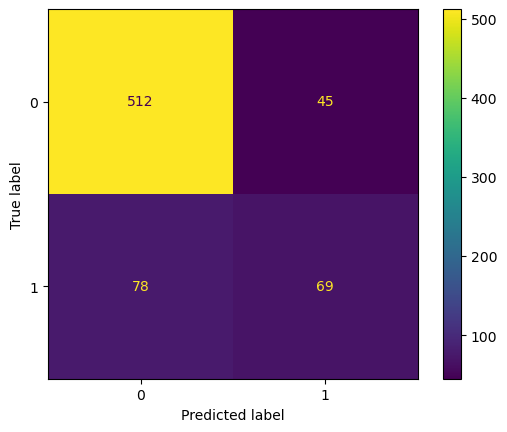

In [54]:
plot_confusion_matrix(grid, X_test, y_test)

## Расширяемые деревья (Boosted Trees)


In [79]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators': [50, 70, 100, 128, 200],
              'learning_rate': [0.1, 0.05, 0.2, 0.25],
              'max_depth': [4, 5, 6, 7, 10]}
gb_model = GradientBoostingClassifier()

In [80]:
grid = GridSearchCV(gb_model, param_grid)

In [81]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2, 0.25],
                         'max_depth': [4, 5, 6, 7, 10],
                         'n_estimators': [50, 70, 100, 128, 200]})

In [82]:
predictions = grid.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       557
           1       0.58      0.49      0.53       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



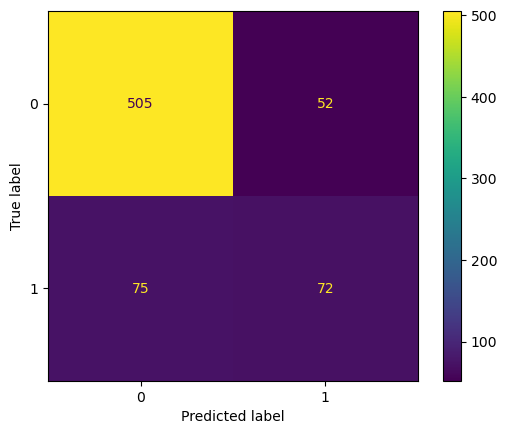

In [86]:
plot_confusion_matrix(grid, X_test, y_test)

In [55]:
# В целом модели показывают очень похожие результаты на этих данных.